In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [2]:
data = pd.read_csv('../../data/auto_mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# '?' 제거

In [3]:
data['horsepower'][30:34]

30     90
31     95
32      ?
33    100
Name: horsepower, dtype: object

### '?'는 문자이므로 median() 함수를 바로 쓸 수 없어 먼저 0으로 바꿔 준 후에
### median() 함수를 적용해 준다.

In [4]:
data['horsepower'] = data['horsepower'].replace('?',0)

In [5]:
data['horsepower']= data['horsepower'].replace(0,data['horsepower'].median())

In [6]:
data['horsepower'][30:34]

30     90
31     95
32     92
33    100
Name: horsepower, dtype: object

# 자동차 이름 전처리

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
data['car name'] = le.fit_transform(data['car name'])
data['car name']

0       49
1       36
2      231
3       14
4      161
      ... 
393    153
394    301
395    119
396    159
397     69
Name: car name, Length: 398, dtype: int32

In [9]:
data.shape

(398, 9)

# x, y로 데이터 나누기

In [10]:
y = data['mpg']
x = data.drop(['mpg'],axis='columns')

In [11]:
x.shape

(398, 8)

In [12]:
y.shape

(398,)

# x 값 StandardScaler로 표준화!

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.49819126,  1.0906037 ,  0.67358934, ..., -1.62742629,
        -0.71514478, -1.11374457],
       [ 1.49819126,  1.5035143 ,  1.59026573, ..., -1.62742629,
        -0.71514478, -1.25918548],
       [ 1.49819126,  1.19623199,  1.19740442, ..., -1.62742629,
        -0.71514478,  0.92242821],
       ...,
       [-0.85632057, -0.56103873, -0.53118534, ...,  1.62198339,
        -0.71514478, -0.33060119],
       [-0.85632057, -0.70507731, -0.66213911, ...,  1.62198339,
        -0.71514478,  0.11690931],
       [-0.85632057, -0.71467988, -0.58356685, ...,  1.62198339,
        -0.71514478, -0.88998932]])

# train, test set 나누기

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=42,
                                                    test_size=.2)

In [16]:
print(f'x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

x_train: (318, 8)
x_test: (80, 8)

y_train: (318,)
y_test: (80,)


# Build a CNN model only Dense

In [17]:
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


In [18]:
model = Sequential()

In [19]:
model.add(Dense(12,
                input_dim=x_train.shape[1],
                activation='relu'))

In [20]:
model.add(Dense(8,
                activation='relu'))

In [21]:
model.add(Dense(1,
                activation='relu'))

# Compile the model

In [22]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model

In [23]:
history = model.fit(x_train,
                    y_train,
                    epochs=60,
                    verbose=1,
                    validation_data=(x_test,y_test))




Train on 318 samples, validate on 80 samples
Epoch 1/60





318/318 [==============================] - 1s 2ms/step - loss: 571.9041 - acc: 0.0000e+00 - val_loss: 540.7757 - val_acc: 0.0000e+00
Epoch 2/60
318/318 [==============================] - 0s 97us/step - loss: 562.4526 - acc: 0.0000e+00 - val_loss: 531.3428 - val_acc: 0.0000e+00
Epoch 3/60
318/318 [==============================] - 0s 88us/step - loss: 551.7745 - acc: 0.0000e+00 - val_loss: 520.8334 - val_acc: 0.0000e+00
Epoch 4/60
318/318 [==============================] - 0s 104us/step - loss: 540.0746 - acc: 0.0000e+00 - val_loss: 508.9803 - val_acc: 0.0000e+00
Epoch 5/60
318/318 [==============================] - 0s 148us/step - loss: 526.5254 - acc: 0.0000e+00 - val_loss: 495.2642 - val_acc: 0.0000e+00
Epoch 6/60
318/318 [==============================] - 0s 104us/step - loss: 511.1708 - acc: 0.0000e+00 - val_loss: 479.8195 - val_acc: 0.0000e+00
Epoch 7/60
318/318 [==============================] - 0s 85us/step - loss: 

318/318 [==============================] - 0s 63us/step - loss: 27.2177 - acc: 0.0535 - val_loss: 28.2584 - val_acc: 0.0625
Epoch 48/60
318/318 [==============================] - 0s 69us/step - loss: 26.5253 - acc: 0.0503 - val_loss: 27.4516 - val_acc: 0.0625
Epoch 49/60
318/318 [==============================] - 0s 85us/step - loss: 25.8686 - acc: 0.0597 - val_loss: 26.6817 - val_acc: 0.0625
Epoch 50/60
318/318 [==============================] - 0s 82us/step - loss: 25.2710 - acc: 0.0629 - val_loss: 25.9096 - val_acc: 0.0625
Epoch 51/60
318/318 [==============================] - 0s 75us/step - loss: 24.6414 - acc: 0.0597 - val_loss: 25.1997 - val_acc: 0.0625
Epoch 52/60
318/318 [==============================] - ETA: 0s - loss: 22.0474 - acc: 0.03 - 0s 63us/step - loss: 24.1328 - acc: 0.0566 - val_loss: 24.4786 - val_acc: 0.0625
Epoch 53/60
318/318 [==============================] - 0s 75us/step - loss: 23.5796 - acc: 0.0566 - val_loss: 23.8102 - val_acc: 0.0750
Epoch 54/60
318/318 [=

# Prediction

In [24]:
y_pred = model.predict(x_test)
y_pred

array([[35.65542  ],
       [33.370815 ],
       [12.368863 ],
       [13.867353 ],
       [14.474716 ],
       [25.22527  ],
       [28.831758 ],
       [17.649595 ],
       [15.688783 ],
       [12.195834 ],
       [14.077063 ],
       [39.89377  ],
       [26.552801 ],
       [14.199129 ],
       [22.577892 ],
       [16.891079 ],
       [31.384434 ],
       [13.39501  ],
       [15.5744705],
       [39.028606 ],
       [24.115593 ],
       [12.1368065],
       [17.42593  ],
       [27.741724 ],
       [12.876372 ],
       [43.329056 ],
       [21.405998 ],
       [21.75916  ],
       [17.03138  ],
       [17.968533 ],
       [29.89558  ],
       [36.361965 ],
       [18.848495 ],
       [22.856686 ],
       [37.697826 ],
       [14.624396 ],
       [12.857819 ],
       [15.118139 ],
       [15.493399 ],
       [23.987621 ],
       [15.319547 ],
       [30.323101 ],
       [17.327831 ],
       [15.177366 ],
       [21.809364 ],
       [33.09525  ],
       [24.58363  ],
       [18.46

# Evaluation

In [25]:
mod_name = model.metrics_names
mod_name

['loss', 'acc']

In [26]:
score = model.evaluate(x_test, y_test)
score

80/80 [==============================] - 0s 50us/step


[19.743479537963868, 0.075]

In [27]:
print(f'{mod_name[0]}: {score[0]}\n{mod_name[1]}: {score[1]}')

loss: 19.743479537963868
acc: 0.075


# Graph

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

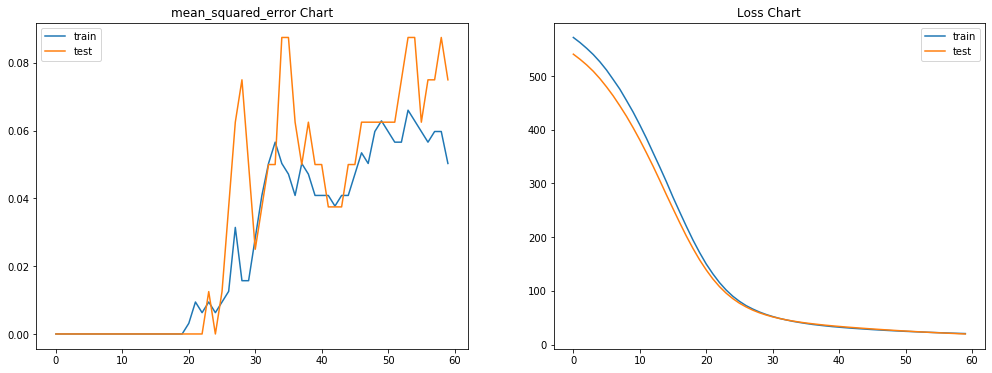

In [30]:
fig, ax = plt.subplots(1,2,figsize=(17,6))
ax = ax.ravel()

ax[0].set_title('mean_squared_error Chart')
ax[0].plot(history.history['acc'], label='train')
ax[0].plot(history.history['val_acc'], label='test')
ax[0].legend(loc='best')

ax[1].set_title('Loss Chart')
ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='test')
ax[1].legend(loc='best')

plt.show()